In [1]:
import os
import util
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
if not os.path.exists("plots"):
    os.mkdir("plots")
libraries = util.select_libraries_from_libraries_io()
dep_changes = util.select_dependency_changes_all()
added_projects = defaultdict(set)
for idx, chg in dep_changes[dep_changes["type"] == "add"].iterrows():
    added_projects[chg["lib2"]].add(chg["project"])
libraries["addedProjects"] = libraries["name"].map(lambda x: len(added_projects[x]))

In [3]:
libraries["versionsCount"] = libraries["name"].map(lambda x: len(util.select_library_versions(x)))

In [ ]:
libraries[["dependentRepositoriesCount", "addedProjects", "versionsCount"]].describe()


In [ ]:
ylabels = ["Number of Libraries", "", ""]
xlabels = ["Number of Dependent Repositories (Libraries.io)", "Number of Projects that Used the Library in our Dataset", "Number of Versions"]
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(data=libraries, x="dependentRepositoriesCount", binwidth=0.25, log_scale=True, ax=axes[0])
sns.histplot(data=libraries["addedProjects"] + 1, binwidth=0.25, log_scale=True, ax=axes[1])
sns.histplot(data=libraries["versionsCount"] + 1, binwidth=0.25, log_scale=True, ax=axes[2])
for i in range(0, 3):
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel(ylabels[i])
fig.savefig("plots/libraries.pdf", bbox_inches="tight")

,dependentRepositoriesCount,addedProjects,versionsCount
count,14630.000000,14630.000000,14630.000000
mean,560.251538,26.419754,46.804853
std,5438.455347,167.341998,122.982477
min,11.000000,0.000000,0.000000
25%,18.000000,1.000000,6.000000
50%,37.000000,4.000000,19.000000
75%,109.000000,12.000000,49.000000
max,408330.000000,11774.000000,4598.000000


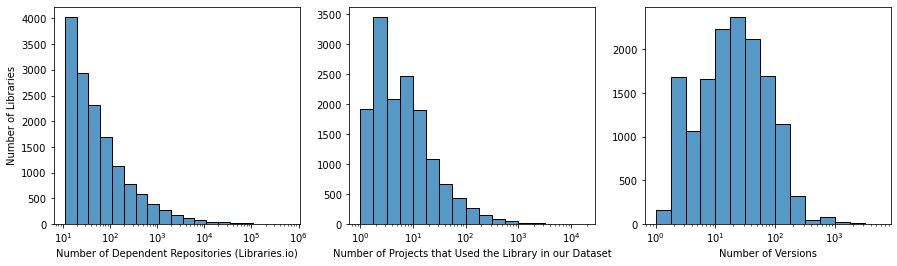

In [10]:
ylabels = ["Number of Libraries", "", ""]
xlabels = ["Number of Dependent Repositories (Libraries.io)", "Number of Projects that Used the Library in our Dataset", "Number of Versions"]
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(data=libraries, x="dependentRepositoriesCount", binwidth=0.25, log_scale=True, ax=axes[0])
sns.histplot(data=libraries["addedProjects"] + 1, binwidth=0.25, log_scale=True, ax=axes[1])
sns.histplot(data=libraries["versionsCount"] + 1, binwidth=0.25, log_scale=True, ax=axes[2])
for i in range(0, 3):
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel(ylabels[i])
fig.savefig("plots/libraries.pdf", bbox_inches="tight")